In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

In [3]:
data = pd.read_csv('C:\\Users\\jha9001\\OneDrive - The Nielsen Company\\Desktop\\Learn\\New folder\\Datatrained_PG_DSci\\DT Projects\\Evaluation Projects\\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# Basic checks of the dataset

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.shape

(1470, 35)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# EDA

In [10]:
data[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [11]:
data.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [12]:
data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [13]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [14]:
data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [15]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [17]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [18]:
data.Over18.unique()

array(['Y'], dtype=object)

In [19]:
data.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
#Dropping Over18 Feature since it has uniclass through out the data
data = data.drop(columns = 'Over18', axis =1 )

In [21]:
data.shape

(1470, 34)

In [22]:
#Encoding the objects with int for the features have class input

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enco = OrdinalEncoder(categories=[['Yes', 'No']])
data['Attrition'] = enco.fit_transform(data[['Attrition']])

In [24]:
enco = OrdinalEncoder(categories=[data.BusinessTravel.unique()])
data['BusinessTravel'] = enco.fit_transform(data[['BusinessTravel']])

In [25]:
enco = OrdinalEncoder(categories=[data.Department.unique()])
data['Department'] = enco.fit_transform(data[['Department']])

In [26]:
enco = OrdinalEncoder(categories=[data.EducationField.unique()])
data['EducationField'] = enco.fit_transform(data[['EducationField']])

In [27]:
enco = OrdinalEncoder(categories=[data.Gender.unique()])
data['Gender'] = enco.fit_transform(data[['Gender']])

In [28]:
enco = OrdinalEncoder(categories=[data.JobRole.unique()])
data['JobRole'] = enco.fit_transform(data[['JobRole']])

In [29]:
enco = OrdinalEncoder(categories=[data.MaritalStatus.unique()])
data['MaritalStatus'] = enco.fit_transform(data[['MaritalStatus']])

In [30]:
enco = OrdinalEncoder(categories=[data.OverTime.unique()])
data['OverTime'] = enco.fit_transform(data[['OverTime']])

In [31]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.0,0.0,1102,0.0,1,2,0.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1.0,0.0,591,1.0,2,1,2.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,1.0,0.0,613,1.0,6,1,2.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,1.0,0.0,155,1.0,4,3,0.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   float64
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.838776,0.367863,0.0,1.00,1.0,1.00,1.0
BusinessTravel,1470.0,0.392517,0.665455,0.0,0.00,0.0,1.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,0.739456,0.527792,0.0,0.00,1.0,1.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,1.462585,1.431780,0.0,0.00,2.0,2.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [34]:
data.shape

(1470, 34)

In [35]:
# Employee count,StandardHours and employee number doesnot have impact So Dropping from dataset

In [36]:
data = data.drop(columns = ['EmployeeCount','EmployeeNumber','StandardHours'],axis = 1)

In [37]:
data.shape

(1470, 31)

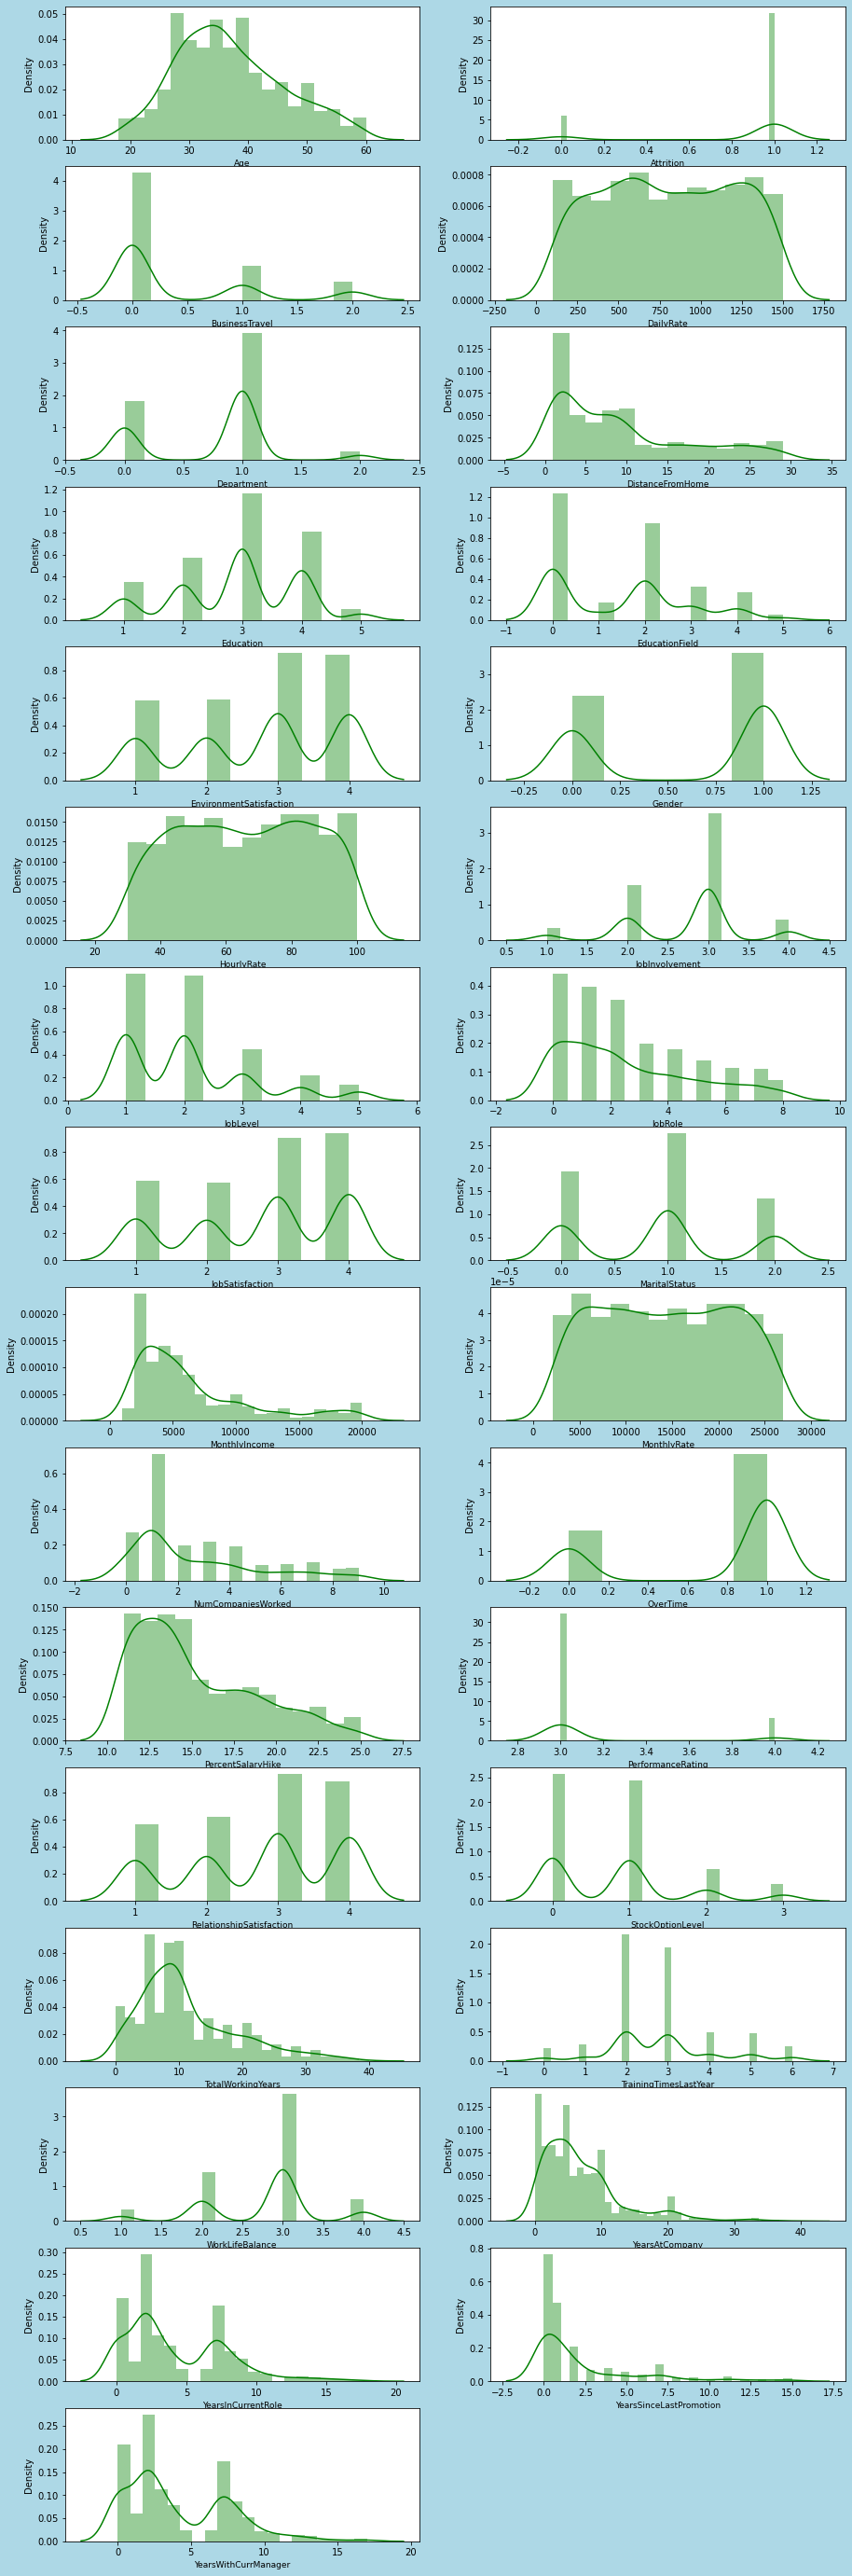

In [38]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=32:
        ax=plt.subplot(16,2,plotnumber)
        sns.distplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [39]:
# all data seems to be fine for all continuous features. 
#its observed that we have data imbalance. We need to treat that

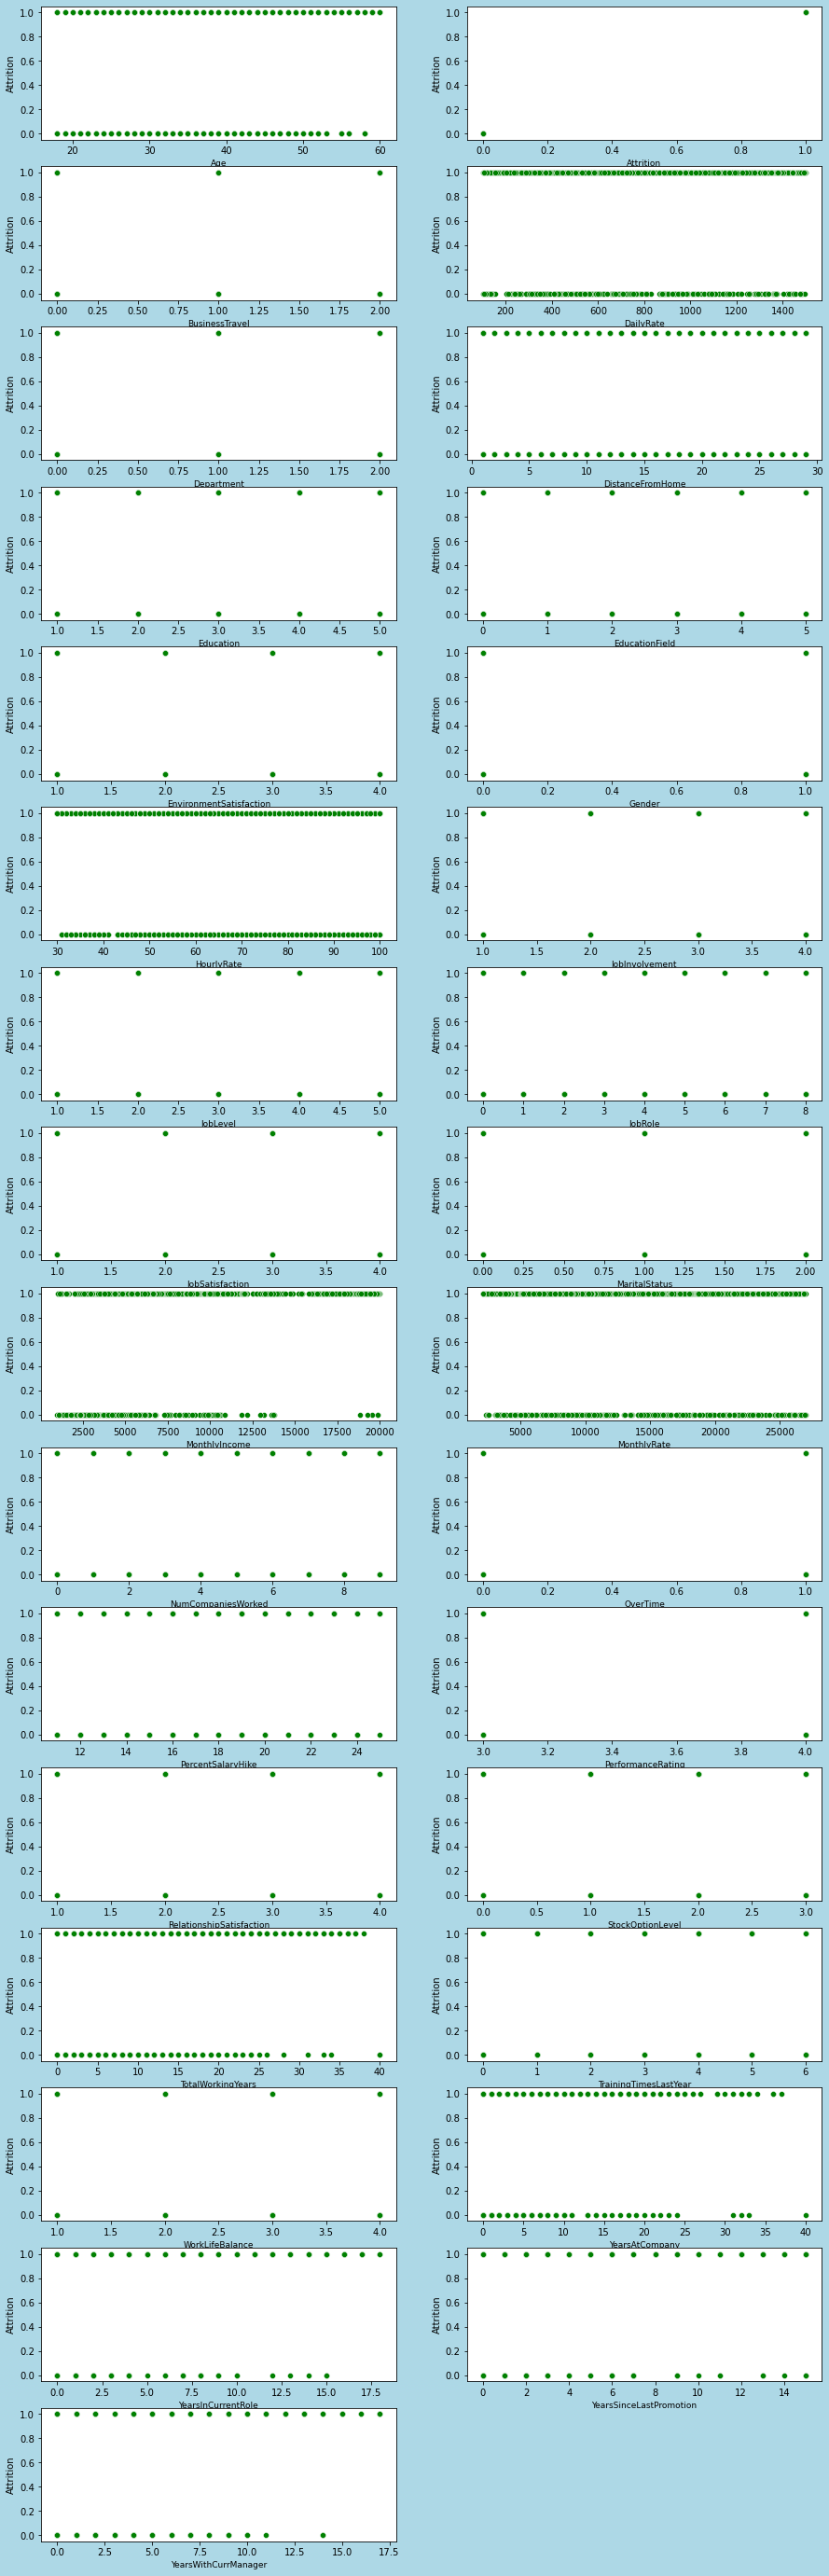

In [40]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=32:
        ax=plt.subplot(16,2,plotnumber)
        sns.scatterplot(data[column],data['Attrition'],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

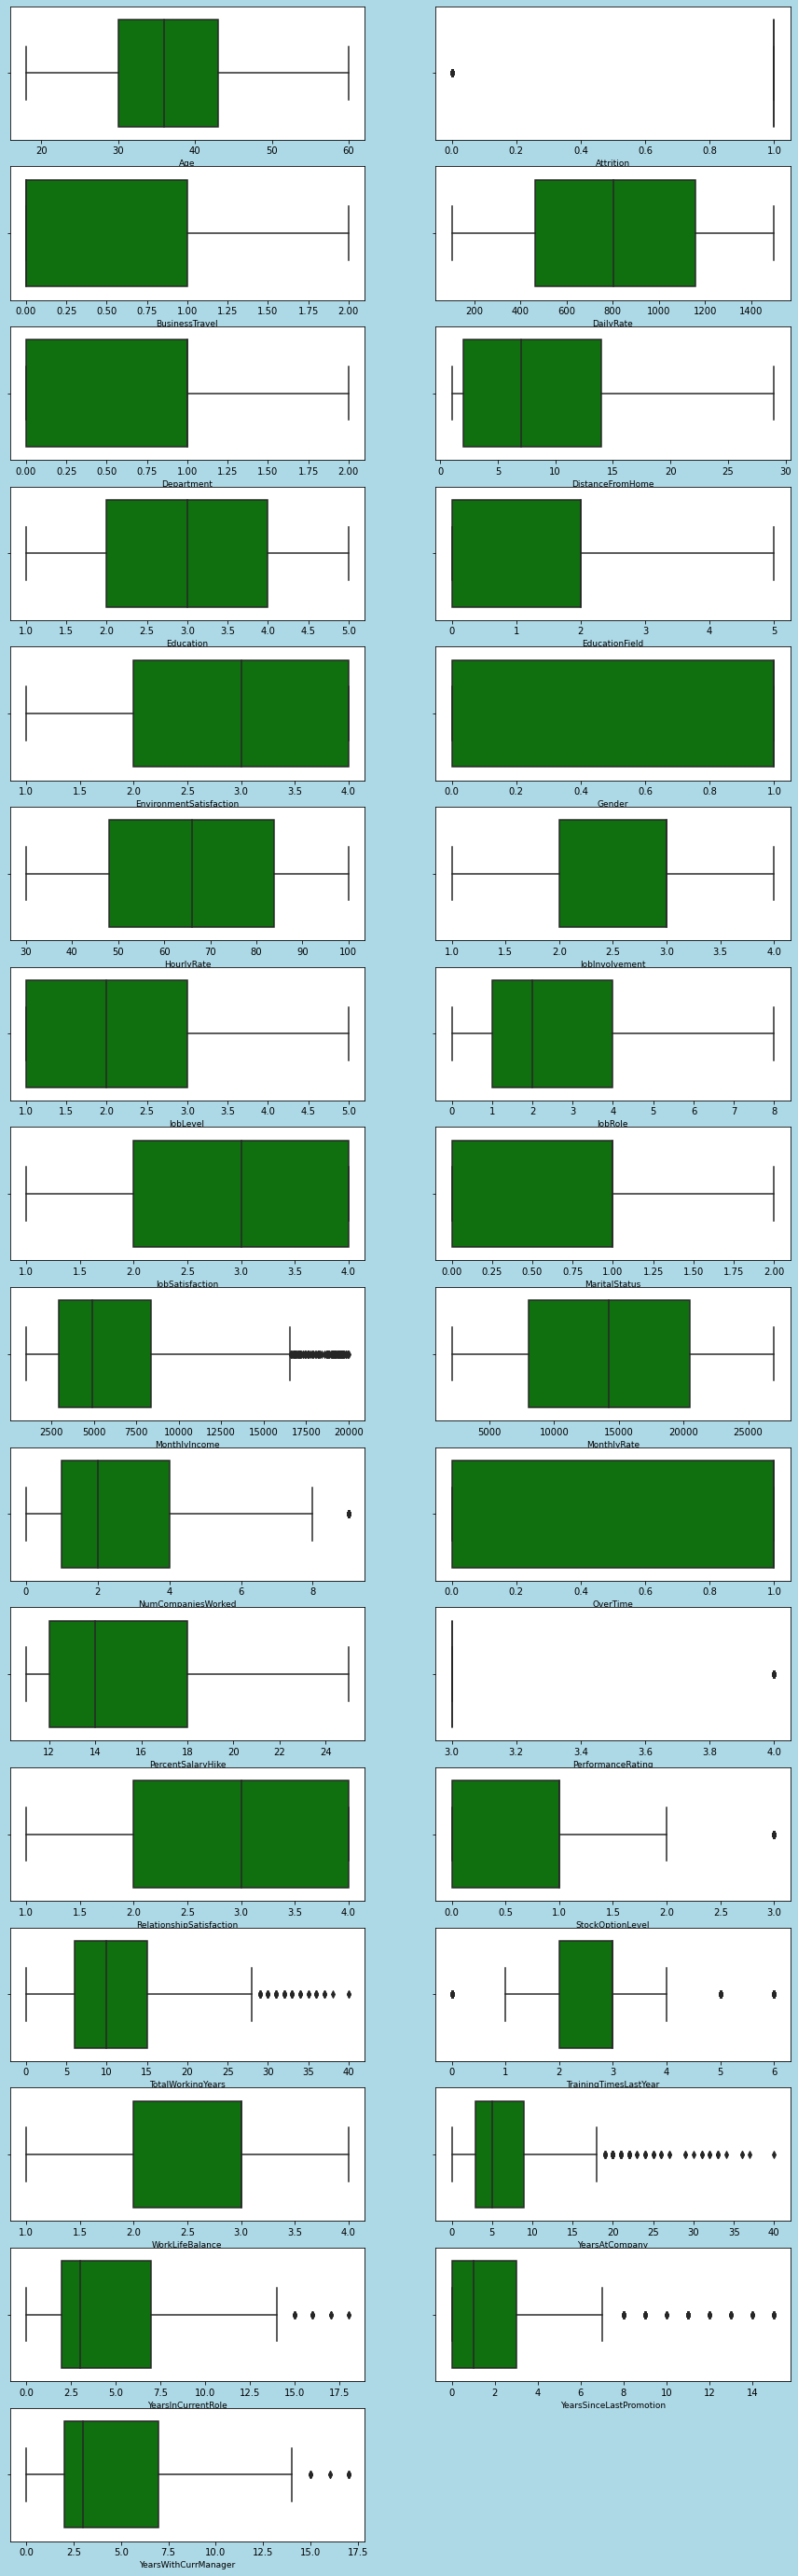

In [41]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=32:
        ax=plt.subplot(16,2,plotnumber)
        sns.boxplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [42]:
# PREPROCESSING

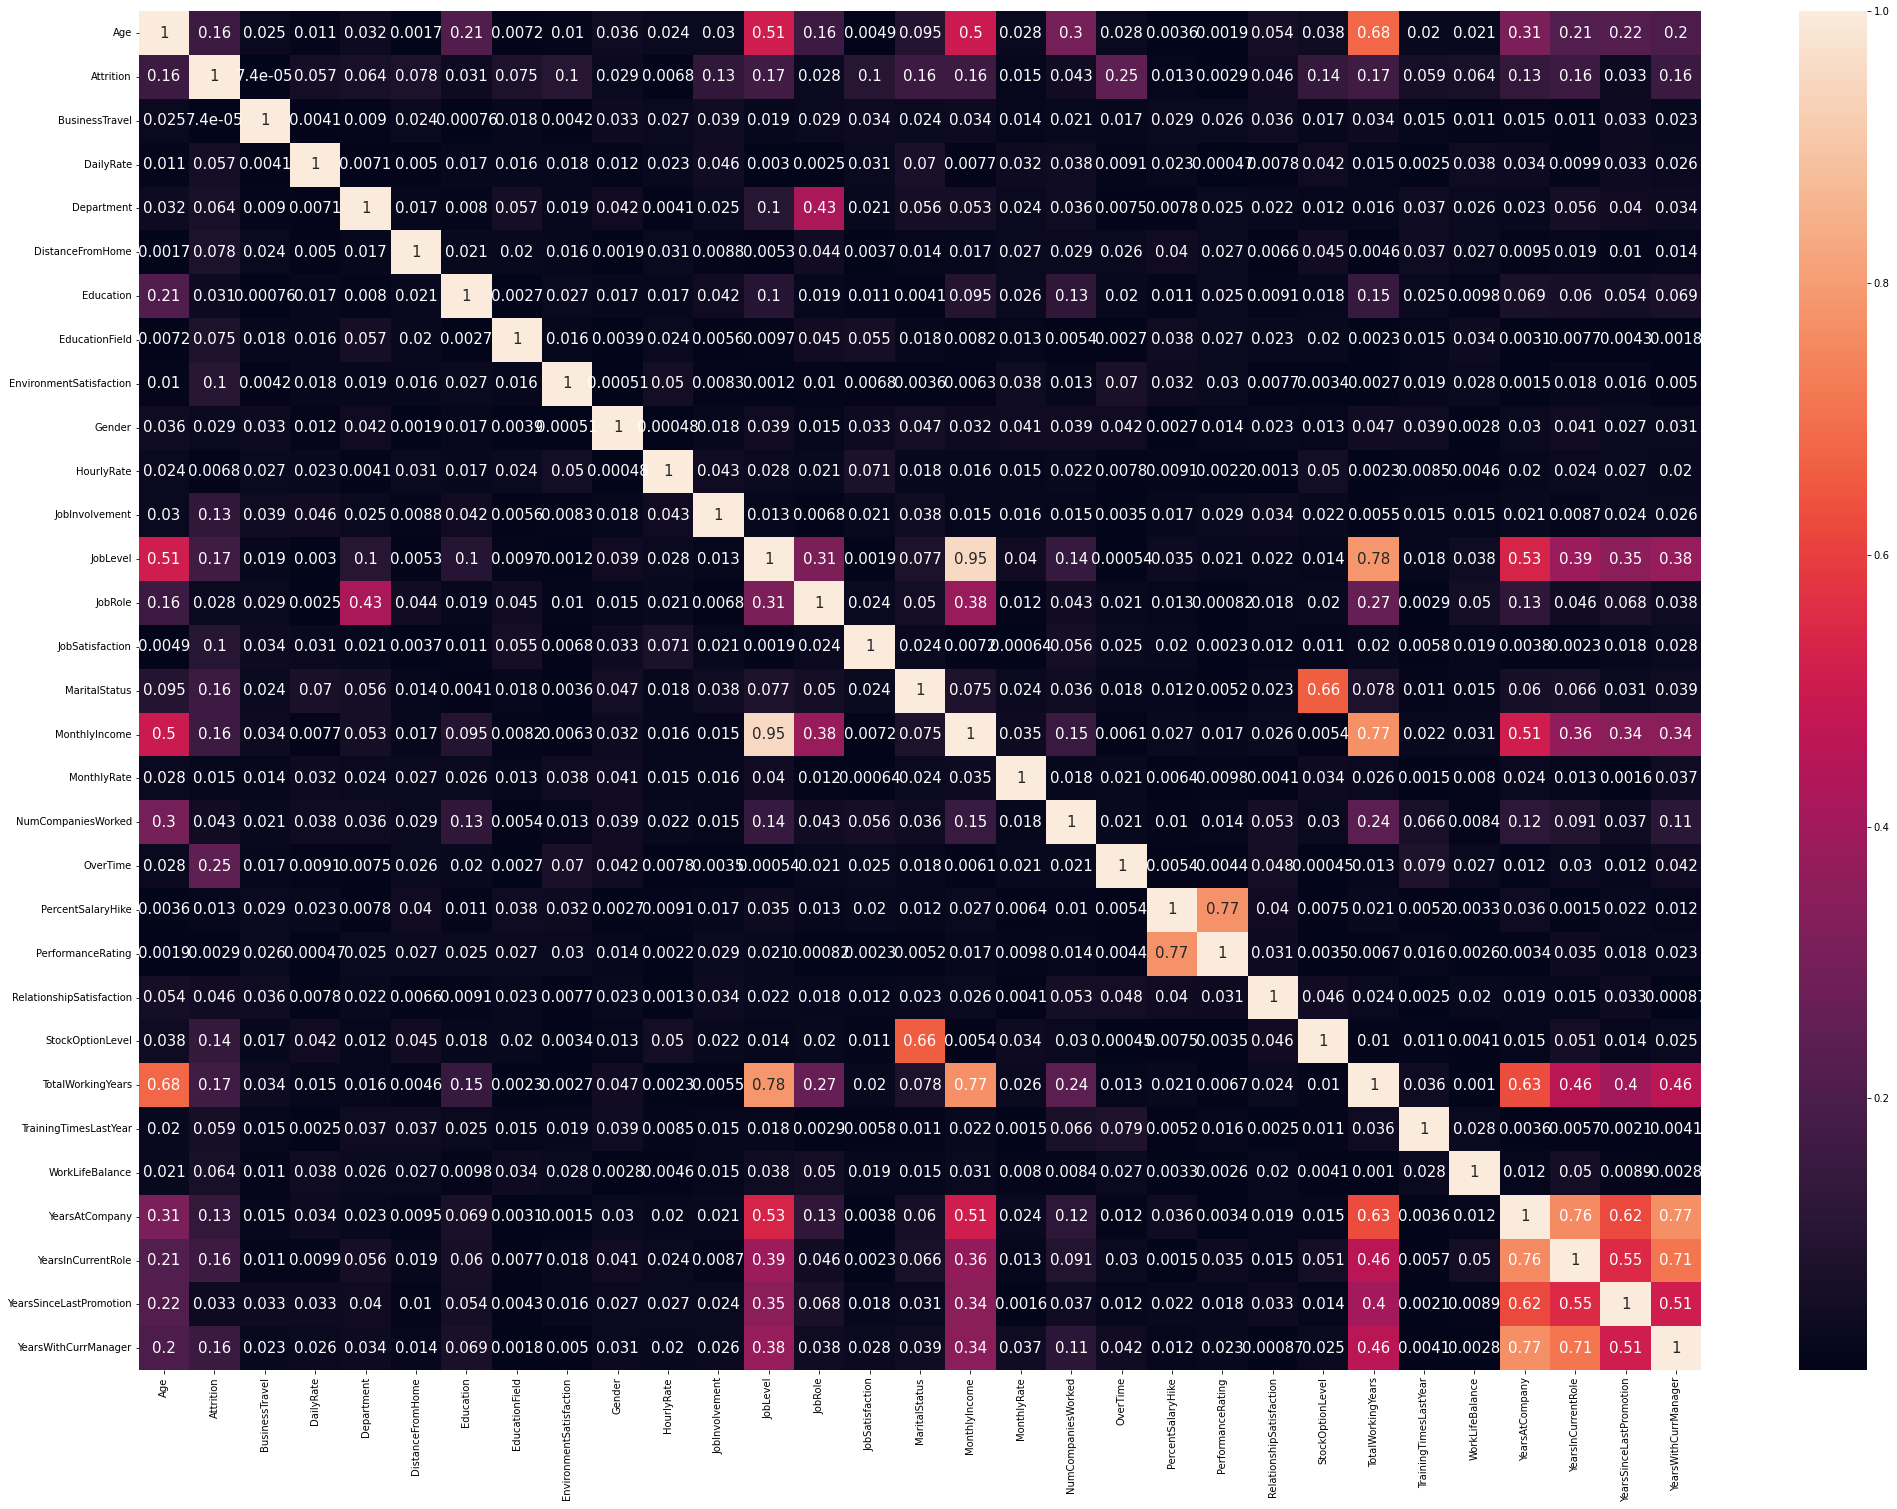

In [43]:
df_corr = data.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

In [44]:
# we will drop MOnthly Income, Total Working Years, yearAt Company which has corelation. 
# we will retain the feature which have high corelation with Attriton

In [45]:
data = data.drop(columns = ['YearsAtCompany','MonthlyIncome', 'TotalWorkingYears'], axis =1)

In [46]:
data.shape

(1470, 28)

In [47]:
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

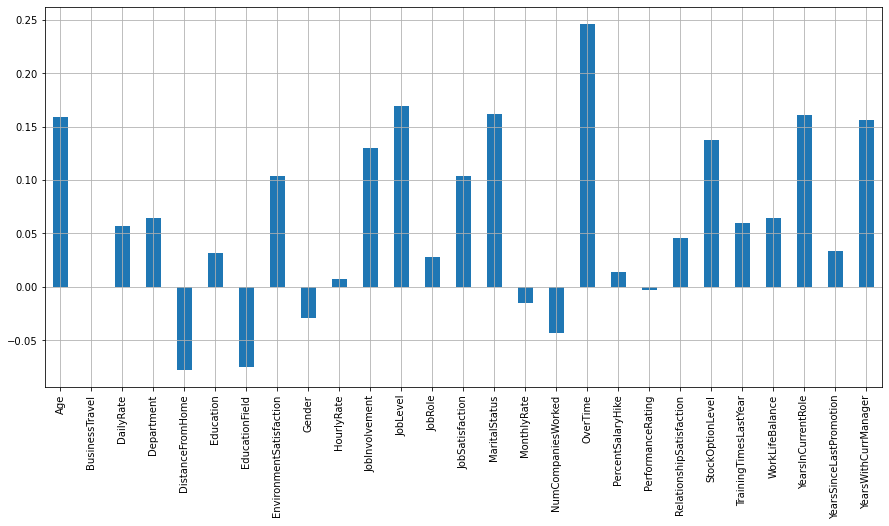

In [48]:
data.drop('Attrition',axis =1).corrwith(data.Attrition).plot(kind = 'bar', grid=True, figsize = (15,7))

In [49]:
# we will drop BusinessTravel,PerformanceRating & HourlyRate

In [50]:
data = data.drop(columns = ['BusinessTravel','PerformanceRating', 'HourlyRate'], axis =1)

In [51]:
data.shape

(1470, 25)

In [52]:
x = data.drop(columns = ['Attrition'],axis =1)
y = data.Attrition

In [53]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.532276,Age
1,1.017627,DailyRate
2,1.367361,Department
3,1.012678,DistanceFromHome
4,1.063103,Education
5,1.018345,EducationField
6,1.012629,EnvironmentSatisfaction
7,1.017758,Gender
8,1.012638,JobInvolvement
9,1.886531,JobLevel


In [55]:
#All VIF value is less than 5. so we do not have colinearity problem

In [56]:
from scipy.stats import skew

In [57]:
# Consider skew map only for continuous feature.

Age
0.41286446154785084


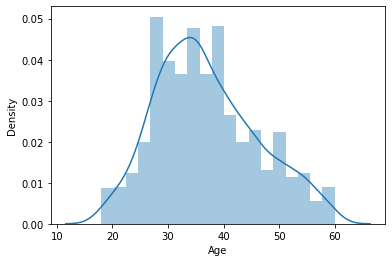

DailyRate
-0.003514976958291024


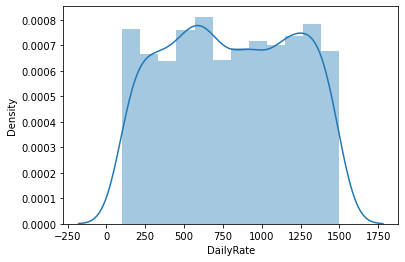

Department
-0.17205501555446134


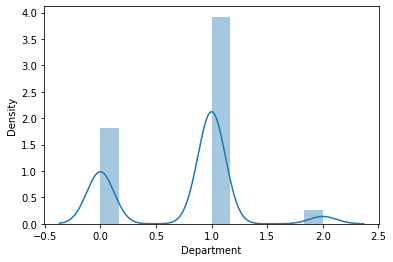

DistanceFromHome
0.9571400469829039


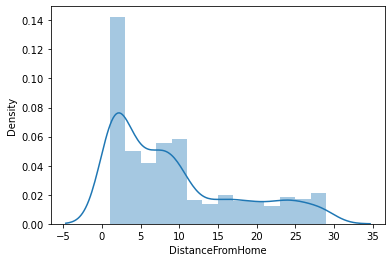

Education
-0.2893854052028825


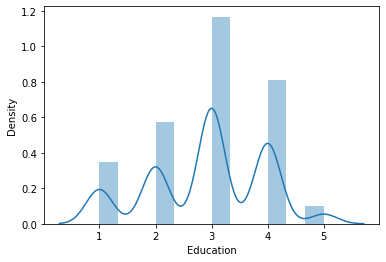

EducationField
0.4865942350151244


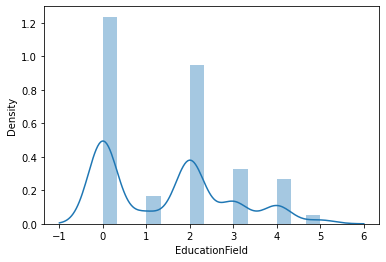

EnvironmentSatisfaction
-0.3213261358382832


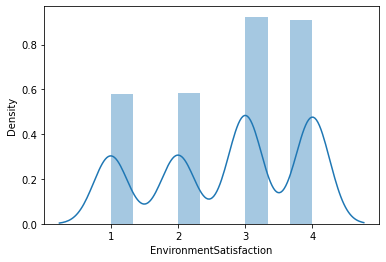

Gender
-0.4082482904638628


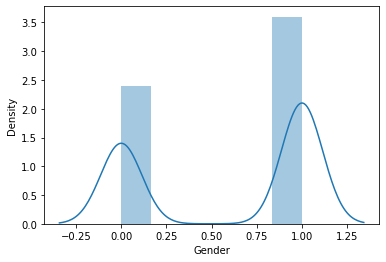

JobInvolvement
-0.4979106286269671


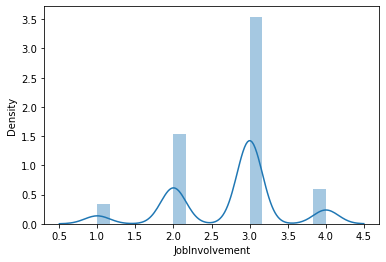

JobLevel
1.0243546583925869


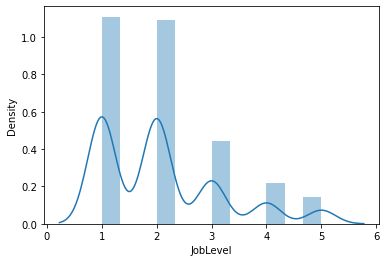

JobRole
0.7693629243515042


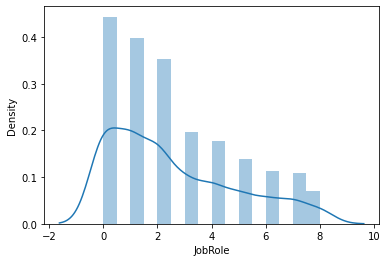

JobSatisfaction
-0.3293354633089524


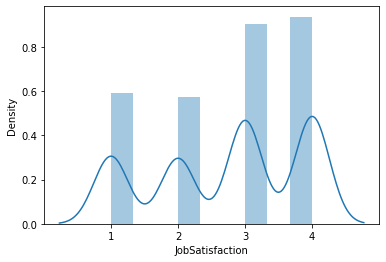

MaritalStatus
0.15201929651271331


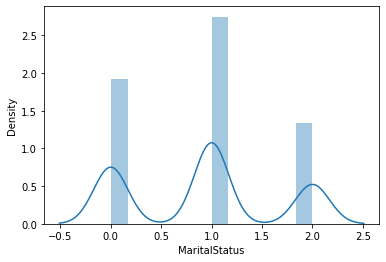

MonthlyRate
0.01855884556846042


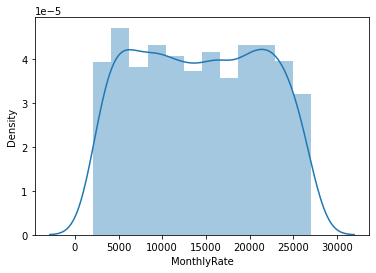

NumCompaniesWorked
1.0254233954371303


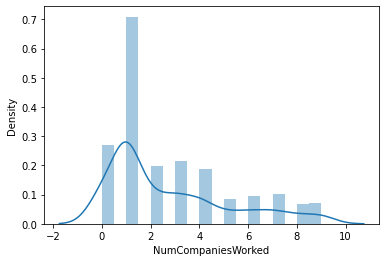

OverTime
-0.963504412638946


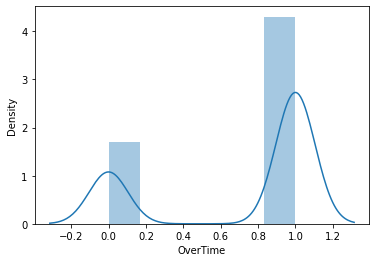

PercentSalaryHike
0.8202898522796266


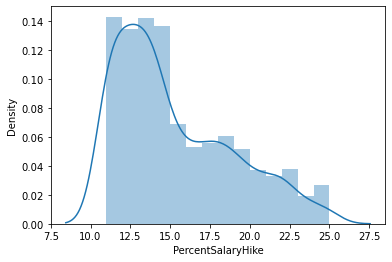

RelationshipSatisfaction
-0.3025184698222079


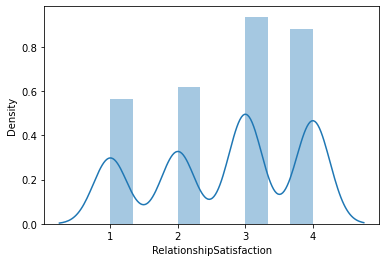

StockOptionLevel
0.9679912809556104


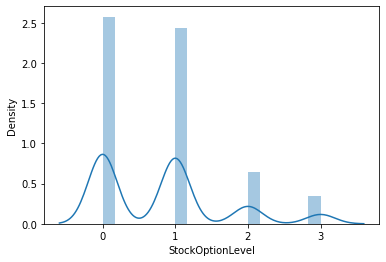

TrainingTimesLastYear
0.5525595985771926


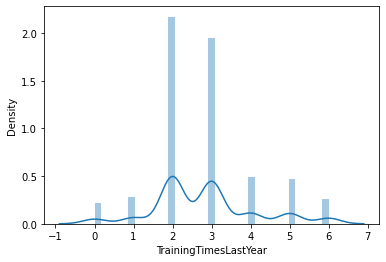

WorkLifeBalance
-0.5519163838185224


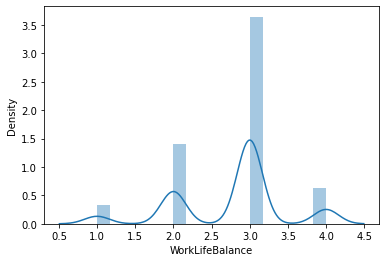

YearsInCurrentRole
0.9164268059808774


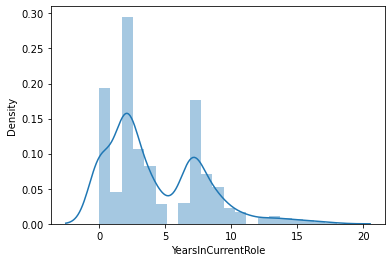

YearsSinceLastPromotion
1.982264623462895


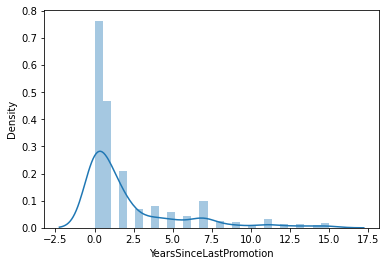

YearsWithCurrManager
0.8326002906209379


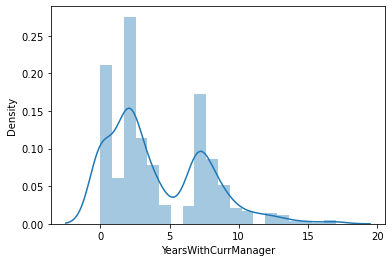

In [58]:
for col in x:
    print(col)
    print(skew(x[col]))
    
    plt.figure()
    sns.distplot(x[col])
    plt.show()

In [59]:
#selction of Random state

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LogisticRegression

In [61]:
lg = LogisticRegression()

In [62]:
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.75,random_state = i)
    lg.fit(x_train, y_train)
    predict_train = lg.predict(x_train)
    predict_test = lg.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{accuracy_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{accuracy_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {0.8784029038112523}
At random state 0, the test set accuracy is  {0.8858695652173914}
At random state 1, the train set accuracy is  {0.8865698729582577}
At random state 1, the test set accuracy is  {0.8505434782608695}
At random state 2, the train set accuracy is  {0.8756805807622504}
At random state 2, the test set accuracy is  {0.8614130434782609}
At random state 3, the train set accuracy is  {0.8774954627949183}
At random state 3, the test set accuracy is  {0.8831521739130435}
At random state 4, the train set accuracy is  {0.8820326678765881}
At random state 4, the test set accuracy is  {0.8777173913043478}
At random state 5, the train set accuracy is  {0.8838475499092558}
At random state 5, the test set accuracy is  {0.8668478260869565}
At random state 6, the train set accuracy is  {0.8738656987295825}
At random state 6, the test set accuracy is  {0.875}
At random state 7, the train set accuracy is  {0.8765880217785844}
At random state

In [63]:
# at random state 53, the model perfroms well.So random state is 53
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.75,random_state = 53)
lg.fit(x_train, y_train)
predict_train = lg.predict(x_train)
predict_test = lg.predict(x_test)
print(f"The train set accuracy is ",{accuracy_score(y_train,predict_train)})
print(f"The test set accuracy is ",{accuracy_score(y_test,predict_test)})

The train set accuracy is  {0.8784029038112523}
The test set accuracy is  {0.8722826086956522}


In [64]:
#Model

In [65]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('Accuracy:', accuracy_score(y_train, train_pred)*100,'% \n')
        print("\n Test Classification Report -\n", classification_report(y_train, train_pred, digits = 2))
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('Accuracy:', accuracy_score(y_test, test_pred)*100,'%\n')
        print("\n Test Classification Report -\n", classification_report(y_test, test_pred, digits = 2))

In [66]:
metric_score(lg,x_train,x_test,y_train,y_test, train = True)
metric_score(lg,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 87.84029038112523 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.75      0.38      0.51       180
         1.0       0.89      0.98      0.93       922

    accuracy                           0.88      1102
   macro avg       0.82      0.68      0.72      1102
weighted avg       0.87      0.88      0.86      1102


===================Test Results============
Accuracy: 87.22826086956522 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.73      0.28      0.41        57
         1.0       0.88      0.98      0.93       311

    accuracy                           0.87       368
   macro avg       0.80      0.63      0.67       368
weighted avg       0.86      0.87      0.85       368



In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gbr = GradientBoostingClassifier()

In [81]:
# Random Forest

In [82]:
metric_score(rf,x_train,x_test,y_train,y_test, train = True)
metric_score(rf,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       180
         1.0       1.00      1.00      1.00       922

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


===================Test Results============
Accuracy: 86.41304347826086 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.82      0.16      0.26        57
         1.0       0.87      0.99      0.93       311

    accuracy                           0.86       368
   macro avg       0.84      0.58      0.59       368
weighted avg       0.86      0.86      0.82       368



In [83]:
# Decision Tree
metric_score(dt,x_train,x_test,y_train,y_test, train = True)
metric_score(dt,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       180
         1.0       1.00      1.00      1.00       922

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


===================Test Results============
Accuracy: 83.69565217391305 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.47      0.44      0.45        57
         1.0       0.90      0.91      0.90       311

    accuracy                           0.84       368
   macro avg       0.69      0.67      0.68       368
weighted avg       0.83      0.84      0.83       368



In [84]:
#knn
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 87.20508166969148 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.87      0.26      0.39       180
         1.0       0.87      0.99      0.93       922

    accuracy                           0.87      1102
   macro avg       0.87      0.62      0.66      1102
weighted avg       0.87      0.87      0.84      1102


===================Test Results============
Accuracy: 85.59782608695652 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.67      0.14      0.23        57
         1.0       0.86      0.99      0.92       311

    accuracy                           0.86       368
   macro avg       0.76      0.56      0.58       368
weighted avg       0.83      0.86      0.81       368



In [85]:
# Gradient Boost 
metric_score(gbr,x_train,x_test,y_train,y_test, train = True)
metric_score(gbr,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 95.37205081669691 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.99      0.72      0.84       180
         1.0       0.95      1.00      0.97       922

    accuracy                           0.95      1102
   macro avg       0.97      0.86      0.90      1102
weighted avg       0.96      0.95      0.95      1102


===================Test Results============
Accuracy: 88.58695652173914 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.83      0.33      0.47        57
         1.0       0.89      0.99      0.94       311

    accuracy                           0.89       368
   macro avg       0.86      0.66      0.71       368
weighted avg       0.88      0.89      0.86       368



In [86]:
# Gradient Boosting Decision Tree gives the high accuracy SO ths model has been selected as final model

In [87]:
from sklearn.model_selection import KFold,cross_val_score

In [88]:
cross_val_score(gbr,x_scaled, y, cv = 5)

array([0.84693878, 0.8537415 , 0.87414966, 0.87755102, 0.8877551 ])

In [89]:
cross_val_score(gbr,x_scaled, y, cv = 5).mean()

0.8673469387755102

In [90]:
# no overfitting exist

In [91]:
# Hyperparameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
grid_param = {'max_depth' : range (4,8),
             'min_samples_split' : range (2,8,2),
             'learning_rate' : np.arange (0.1,0.5)}

In [94]:
grid = GridSearchCV(gbr, param_grid = grid_param)
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [95]:
best = grid.best_params_
best

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2}

In [108]:
grid_model = GradientBoostingClassifier(learning_rate= 0.15, max_depth= 4, min_samples_split= 2)

In [109]:
grid_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=4)

In [110]:
metric_score(grid_model,x_train,x_test,y_train,y_test, train = True)
metric_score(grid_model,x_train,x_test,y_train,y_test, train = False)


===================Train Results============
Accuracy: 99.90925589836661 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       180
         1.0       1.00      1.00      1.00       922

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


===================Test Results============
Accuracy: 87.5 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.69      0.35      0.47        57
         1.0       0.89      0.97      0.93       311

    accuracy                           0.88       368
   macro avg       0.79      0.66      0.70       368
weighted avg       0.86      0.88      0.86       368



In [103]:
#saving the model

In [111]:
filename = 'HR Analytics'
pickle.dump(grid_model,open(filename,'wb'))

In [112]:
saved_mod = pickle.load(open(filename,'rb'))

In [113]:
saved_mod.predict(x_test)

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [114]:
y_test

462     1.0
1273    0.0
464     1.0
666     0.0
377     1.0
       ... 
880     1.0
939     0.0
366     0.0
1218    1.0
787     1.0
Name: Attrition, Length: 368, dtype: float64

In [115]:
#prediction is almost close to the actual

In [116]:
#End of Project